# Week 4: Best Fit Lines and the Theis Solution

Today let's take a look at withdrawals from an industry in the East St. Louis area. These withdrawals include both groundwater and surface water. First, let's examine how pumpage has changed in the past few decades (1980 onward). Then, let's investigate if there are trends that we can use to extrapolate expected water demands (usage) out to 2050 for this region.

After working with pumpage, let's take a quick look at the Theis Solution and how to code this up. You will be using this in Homework 4. 

## Import Packages/Libraries

In [0]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spo
import scipy.special as sps
import math

%matplotlib inline

## Import Demands for an industry in Madison County

<ul>
    <li>Surface Water (sw)</li>
    <li>Groundwater (gw)</li>
</ul>

In [0]:
gc_df = pd.read_excel('industry.xlsx',index_col=0)
print(gc_df)

             gw         sw
year                      
1979   6.842298  18.980151
1980   3.647433  21.507734
1981   4.591923  16.563450
1982   6.881588  15.475154
1983   7.186311   9.884463
1984  11.709788   9.571526
1985   6.611910   9.497604
1986   9.368925   9.497604
1987   9.368925  14.902669
1988   7.006434  17.785079
1989   7.476523  18.413689
1990   7.286516  19.837372
1991   3.028063        NaN
1995   4.996578        NaN
1996   5.830108  18.891170
1997   5.677755  16.692676
1998   5.552361  15.225188
1999   5.453799  11.258042
2000   4.720055  14.827105
2001   4.020808  12.527858
2002   4.208077  12.168652
2003   3.730322  12.284736
2004   1.578645   9.817933
2005   1.562218  11.490760
2006   1.667551  11.285421
2007   1.627652   6.811773
2008   2.761780   4.919918
2009   4.040977   8.183436
2010   7.876747   7.570157
2011   8.025975   6.699521
2012   8.859953   7.433265
2013  11.728783   9.107461
2014   7.769610   8.038330
2015   3.293415   8.691855
2016   0.527310  10.433402
2

## Plot industrial demands

Text(0, 0.5, 'Mgd')

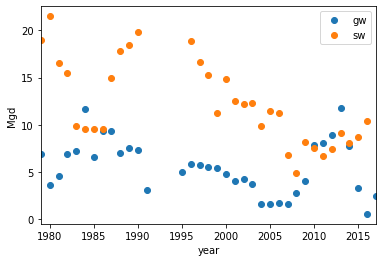

In [0]:
gc_df.plot(style='o')
plt.ylabel('Mgd')

## Define a linear function to create a best fit line

When defining a function, always use the following syntax:

`def functionname(argument1,argument2,.....):`</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `write code here`</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `return output1, output2,.....`

To call the function, write

`output1, output2 = functionname(argument1,argument2)`

[-7.63454373e-02  1.58097158e+02]
<class 'pandas.core.series.Series'>


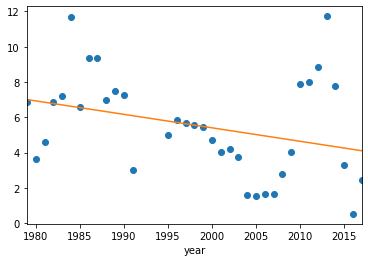

In [0]:
# define a function that defines our line
def linear(time,m,b):
    return m*time+b

# code that returns the parameters m & b
para, cova = spo.curve_fit(linear,gc_df.index,gc_df.gw,p0=[0.0000001,0.0000001])
print(para)
slope = para[0]
yint = para[1]

year = gc_df.index.to_series()
fitline = linear(year,slope,yint)
print(type(fitline))

gc_df.gw.plot(style='o')
fitline.plot()

## Linear trend to 2050?

In [0]:
linear(2050,slope,yint)

1.5890116633247828

### Theis solution

Recall that the Theis solution is:

<font size = 10>$s=\frac{Q}{4\pi T} W(\frac{r^2S}{4Tt})$</font>

where s is drawdown, Q is pumpage, T is transmissivity, r is distance from well, S is storage, and t is time the well has been on. The well function has many names, with the most formal mathematical name being the `exponential integral`. For the mathematicians out there, [here is more context on the exponential integral.](http://mathworld.wolfram.com/ExponentialIntegral.html). For our purposes, we don't have to work with the exponential integral any differently than we do a natural logarithm or sinusoidal function. We just have to know where it is located. It turns out it is in the SciPy library as a [special function](https://docs.scipy.org/doc/scipy/reference/special.html).

Let's do an example problem related to the NE Illinois sandstone. Assume that we want to know how much drawdown a new well might have on a nearby well (500 ft away) after running continuously for 1 day? 1 week? 1 year? Assume the well pumps 133,000 $ft^3/day$, transmissivity is 1200 $ft^2/day$, $S_s$ is 2.6E-7 $\frac{1}{ft}$, and aquifer thickness is 400 $ft$.

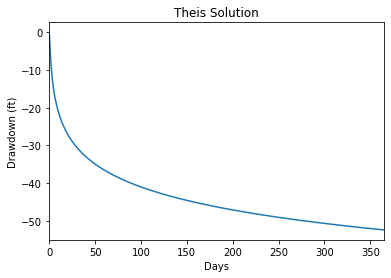

In [0]:
Q = -133000 #ft^3/d
T = 1200 #ft^2/d
S_s = 2.6*10**-7 #1/ft
b = 400 #ft
S = b*S_s
r = 5000 #ft

t = pd.Series(range(0,366))
u = r**2*S/(4*T*t)

s = Q/(4*math.pi*T)*sps.exp1(u)

s.plot()
plt.title('Theis Solution')
plt.xlabel('Days')
plt.ylabel('Drawdown (ft)')
plt.show()